<b>Part 1 - Tokenization</b>
<br>
<i>Source</i> : https://www.youtube.com/watch?v=fNxaJsNG3-s&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
sentences = [
             'I love my Dog',
             'I love my Cat'
]

In [ ]:
tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)

In [ ]:
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


In [ ]:
sentences = [
             'I love my Dog',
             'I love my Cat',
             'i love my dog!'
]

In [ ]:
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


<b>Part 2 - Sequencing:Turning sentences to data</b>
<br>
<i>Source</i> : https://www.youtube.com/watch?v=r9QjkdSJZ2g&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S&index=2

In [ ]:
sentences = [
             'I love my Dog',
             'I love my Cat',
             'You love my dog.',
             'Do you think my dog is amazing?'
]

In [ ]:
tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [ ]:
word_index

{'amazing': 10,
 'cat': 6,
 'do': 7,
 'dog': 3,
 'i': 4,
 'is': 9,
 'love': 2,
 'my': 1,
 'think': 8,
 'you': 5}

In [ ]:
tokenizer.texts_to_sequences(sentences)

[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]

In [ ]:
test_data = [
             'I really love my dog.',
             'My dog loves my manatee.'
]

In [ ]:
# So, new words are not being tokenized
tokenizer.texts_to_sequences(test_data)

[[4, 2, 1, 3], [1, 3, 1]]

In [ ]:
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'amazing': 11,
 'cat': 7,
 'do': 8,
 'dog': 4,
 'i': 5,
 'is': 10,
 'love': 3,
 'my': 2,
 'think': 9,
 'you': 6}

In [ ]:
# Now the sentences are of correct length
tokenizer.texts_to_sequences(test_data)

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

In [ ]:
# Sentences are of different lengths overall
tokenizer.texts_to_sequences(sentences)

[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
sequence = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequence)
print(sequence)
print(padded)

[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


In [ ]:
padded = pad_sequences(sequence, padding='post')
print(padded)

[[ 5  3  2  4  0  0  0]
 [ 5  3  2  7  0  0  0]
 [ 6  3  2  4  0  0  0]
 [ 8  6  9  2  4 10 11]]


In [ ]:
padded = pad_sequences(sequence, padding='post', maxlen=5)
print(padded)

[[ 5  3  2  4  0]
 [ 5  3  2  7  0]
 [ 6  3  2  4  0]
 [ 9  2  4 10 11]]


In [ ]:
padded = pad_sequences(sequence, padding='post', maxlen=5, truncating='post')
print(padded)

[[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]


<b>Part 3 - Training a model to recognize sentiment in text</b>
<br>
<i>Source</i> : https://www.youtube.com/watch?v=Y_hzMnRXjhI&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S&index=3
<br>
<i>Data Source</i> : https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection/home
<br>
<i>Colab Notebook</i> : https://goo.gle/tfw-sarcembed

In [3]:
import json

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def parseJson(fname):
    for line in open(fname, 'r'):
        yield eval(line)

datastore = list(parseJson('/content/drive/MyDrive/Colab Notebooks/sarcasm_headlines/Sarcasm_Headlines_Dataset_v2.json'))

In [5]:
datastore[0]

{'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205',
 'headline': 'thirtysomething scientists unveil doomsday clock of hair loss',
 'is_sarcastic': 1}

In [6]:
# Loading the data
sentences = []
labels = []
urls = []

for data in datastore:
    sentences.append(data['headline'])
    labels.append(data['is_sarcastic'])
    urls.append(data['article_link'])

In [7]:
# Preprocessing
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [8]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[42])
print(padded.shape)

[1051   71 9029   26 2262    2    4  954  177 2646    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
(28619, 152)


In [9]:
# Train-Test Split
training_size = 20000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [10]:
# The tokenizer should only be fit on training data. Hence the below code -
vocab_size = 10000
oov_tok = '<OOV>'
max_length = 100
padding_type='post'
trunc_type = 'post'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [11]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [12]:
# Try checking this cell without the one before to see what's working with tf2.x and what's not.
training_padded

array([[   1,  325, 3169, ...,    0,    0,    0],
       [5818, 1723,  735, ...,    0,    0,    0],
       [ 920,   36, 9074, ...,    0,    0,    0],
       ...,
       [1358,  335, 2673, ...,    0,    0,    0],
       [  39,  131,  113, ...,    0,    0,    0],
       [1692, 5003, 3538, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# Building the Model
embedding_dim = 8

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 8)            80000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 24)                216       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 80,241
Trainable params: 80,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the Model
num_epochs = 20

history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/20
625/625 - 2s - loss: 0.6825 - accuracy: 0.5565 - val_loss: 0.6347 - val_accuracy: 0.6577
Epoch 2/20
625/625 - 1s - loss: 0.4889 - accuracy: 0.8074 - val_loss: 0.4034 - val_accuracy: 0.8284
Epoch 3/20
625/625 - 1s - loss: 0.3417 - accuracy: 0.8618 - val_loss: 0.3562 - val_accuracy: 0.8456
Epoch 4/20
625/625 - 1s - loss: 0.2850 - accuracy: 0.8887 - val_loss: 0.3477 - val_accuracy: 0.8466
Epoch 5/20
625/625 - 1s - loss: 0.2480 - accuracy: 0.9039 - val_loss: 0.3399 - val_accuracy: 0.8521
Epoch 6/20
625/625 - 1s - loss: 0.2204 - accuracy: 0.9144 - val_loss: 0.3345 - val_accuracy: 0.8571
Epoch 7/20
625/625 - 1s - loss: 0.1965 - accuracy: 0.9260 - val_loss: 0.3413 - val_accuracy: 0.8567
Epoch 8/20
625/625 - 1s - loss: 0.1783 - accuracy: 0.9345 - val_loss: 0.3641 - val_accuracy: 0.8501
Epoch 9/20
625/625 - 1s - loss: 0.1609 - accuracy: 0.9402 - val_loss: 0.3661 - val_accuracy: 0.8511
Epoch 10/20
625/625 - 1s - loss: 0.1467 - accuracy: 0.9481 - val_loss: 0.3844 - val_accuracy: 0.8477

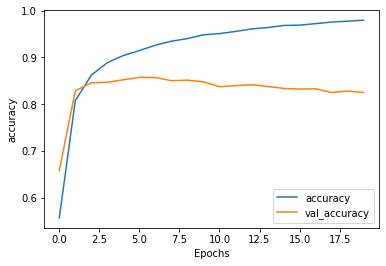

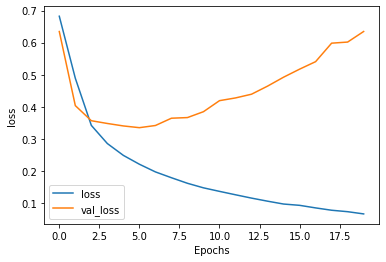

In [ ]:
# Plot the model training progress
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# Predicting sentiment in new sentences
sentence = [
            "granny starting to fear spiders in the garden might be real",
            "game of thrones season finale showing this sunday night"
            ]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[7.3352277e-01]
 [4.2033195e-04]]


In [ ]:
# Predicting sentiment in new sentences
sentence = [
            "Knock.Knock. Who's there? Just Air."
            ]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.8913724]]


<b>Part 4 - ML with Recurrent Neural Network</b>
<br>
<i>Source</i> : https://www.youtube.com/watch?v=OuYtk9Ymut4&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S&index=4
<br>
<i>Colab Notebook</i> : https://goo.gle/3aSTLGx

In [ ]:
# The colab link above is for Irish Song Generator.

<b>Part 5 - Long Short-Term Memory for NLP</b>
<br>
<i>Source</i> : https://www.youtube.com/watch?v=A9QVYOBjZdY&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S&index=5

In [ ]:
# Building the Model with a Bi-directional LSTM
embedding_dim = 64

model_bilstm1 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.num_words, embedding_dim),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model_bilstm1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_bilstm1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 714,369
Trainable params: 714,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the Model
num_epochs = 10

history = model_bilstm1.fit(training_padded, training_labels, epochs=num_epochs,
                            validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 86s - loss: 0.3898 - accuracy: 0.8146 - val_loss: 0.3117 - val_accuracy: 0.8615
Epoch 2/10
625/625 - 55s - loss: 0.1966 - accuracy: 0.9226 - val_loss: 0.3357 - val_accuracy: 0.8562
Epoch 3/10
625/625 - 55s - loss: 0.1091 - accuracy: 0.9595 - val_loss: 0.4040 - val_accuracy: 0.8527
Epoch 4/10
625/625 - 55s - loss: 0.0626 - accuracy: 0.9779 - val_loss: 0.5551 - val_accuracy: 0.8437
Epoch 5/10
625/625 - 55s - loss: 0.0367 - accuracy: 0.9876 - val_loss: 0.6245 - val_accuracy: 0.8420
Epoch 6/10
625/625 - 55s - loss: 0.0232 - accuracy: 0.9918 - val_loss: 0.7865 - val_accuracy: 0.8451
Epoch 7/10
625/625 - 55s - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.9531 - val_accuracy: 0.8343
Epoch 8/10
625/625 - 55s - loss: 0.0118 - accuracy: 0.9959 - val_loss: 0.9267 - val_accuracy: 0.8385
Epoch 9/10
625/625 - 55s - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.9370 - val_accuracy: 0.8348
Epoch 10/10
625/625 - 55s - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.9003 - val_accura

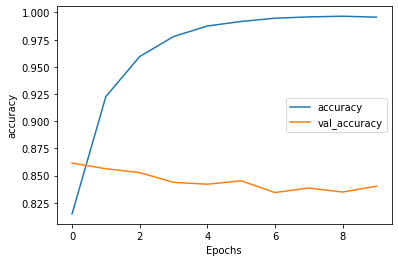

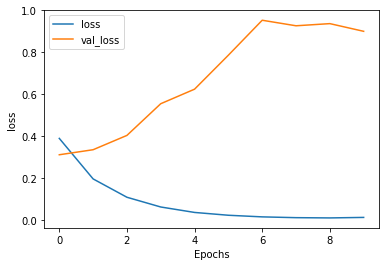

In [ ]:
# Plot the model training progress
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# Predicting sentiment in new sentences
sentence = [
            "granny starting to fear spiders in the garden might be real",
            "game of thrones season finale showing this sunday night",
            "Knock.Knock. Who's there? Just Air."
            ]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model_bilstm1.predict(padded))

[[3.4385324e-03]
 [3.6699494e-05]
 [3.2601655e-03]]


In [13]:
# Building the Model with mutiple Bi-directional LSTM layers
embedding_dim = 64

model_bilstm2 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.num_words, embedding_dim),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model_bilstm2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model_bilstm2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 748,321
Trainable params: 748,321
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Training the Model
num_epochs = 10

history = model_bilstm2.fit(training_padded, training_labels, epochs=num_epochs,
                            validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 107s - loss: 0.3913 - accuracy: 0.8159 - val_loss: 0.3218 - val_accuracy: 0.8533
Epoch 2/10
625/625 - 100s - loss: 0.2011 - accuracy: 0.9205 - val_loss: 0.3331 - val_accuracy: 0.8552
Epoch 3/10
625/625 - 100s - loss: 0.1171 - accuracy: 0.9563 - val_loss: 0.4075 - val_accuracy: 0.8509
Epoch 4/10
625/625 - 100s - loss: 0.0677 - accuracy: 0.9772 - val_loss: 0.5109 - val_accuracy: 0.8409
Epoch 5/10
625/625 - 100s - loss: 0.0438 - accuracy: 0.9858 - val_loss: 0.6687 - val_accuracy: 0.8427
Epoch 6/10
625/625 - 100s - loss: 0.0323 - accuracy: 0.9886 - val_loss: 0.6701 - val_accuracy: 0.8426
Epoch 7/10
625/625 - 100s - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.7809 - val_accuracy: 0.8398
Epoch 8/10
625/625 - 100s - loss: 0.0173 - accuracy: 0.9941 - val_loss: 0.7643 - val_accuracy: 0.8399
Epoch 9/10
625/625 - 100s - loss: 0.0113 - accuracy: 0.9968 - val_loss: 0.8787 - val_accuracy: 0.8412
Epoch 10/10
625/625 - 100s - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.8707 - 

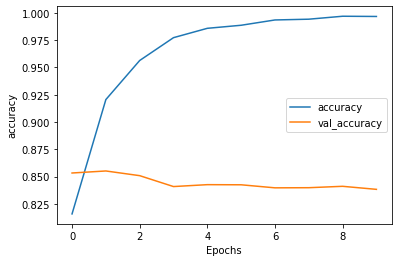

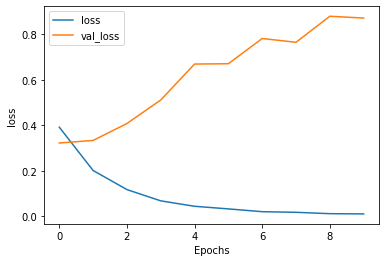

In [16]:
# Plot the model training progress
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [17]:
# Predicting sentiment in new sentences
sentence = [
            "granny starting to fear spiders in the garden might be real",
            "game of thrones season finale showing this sunday night",
            "Knock.Knock. Who's there? Just Air."
            ]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model_bilstm2.predict(padded))

[[6.3094497e-03]
 [5.9045080e-05]
 [3.9529800e-04]]


<b>Part 6 - Training an AI to create poetry</b>
<br>
<i>Source</i> : https://www.youtube.com/watch?v=ZMudJXhsUpY&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S&index=8

In [18]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [19]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2021-06-06 18:52:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2021-06-06 18:52:58 (105 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [22]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [30]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [32]:
# Sample input sequences
input_sequences[:10]

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361]]

In [33]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [34]:
# Sample input sequences
input_sequences[:10]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   51,   12],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   51,   12,   96],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   51,   12,   96, 1217],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          51,   12,   96, 1217,   48],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   51,
          12,   96, 1217,   48,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   51,   12,
          96, 1217,   48,    2,   69],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    2,   11],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    2,   11,   15],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    2,   

In [35]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [36]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [39]:
print(xs[6])
print(ys[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0. 0. 0. ... 0. 0. 0.]


In [42]:
# Building the Model
model = Sequential()
model.add(Embedding(total_words, 240, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 15, 240)           645600    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 300)               469200    
_________________________________________________________________
dense_3 (Dense)              (None, 2690)              809690    
Total params: 1,924,490
Trainable params: 1,924,490
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
# Training the model
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
377/377 [==============================] - 38s 93ms/step - loss: 6.6407 - accuracy: 0.0743
Epoch 2/100
377/377 [==============================] - 35s 93ms/step - loss: 5.7301 - accuracy: 0.1179
Epoch 3/100
377/377 [==============================] - 35s 92ms/step - loss: 4.8484 - accuracy: 0.1656
Epoch 4/100
377/377 [==============================] - 35s 93ms/step - loss: 4.0279 - accuracy: 0.2301
Epoch 5/100
377/377 [==============================] - 35s 93ms/step - loss: 3.5459 - accuracy: 0.2859
Epoch 6/100
377/377 [==============================] - 35s 93ms/step - loss: 2.9122 - accuracy: 0.3638
Epoch 7/100
377/377 [==============================] - 35s 93ms/step - loss: 2.3729 - accuracy: 0.4526
Epoch 8/100
377/377 [==============================] - 35s 93ms/step - loss: 2.0191 - accuracy: 0.5211
Epoch 9/100
377/377 [==============================] - 35s 94ms/step - loss: 1.8033 - accuracy: 0.5636
Epoch 10/100
377/377 [==============================] - 35s 93ms/step - l

In [45]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

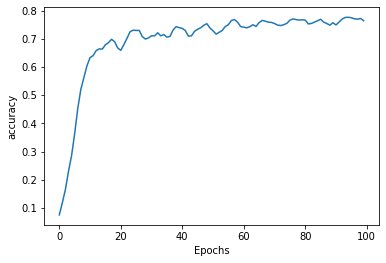

In [46]:
plot_graphs(history, 'accuracy')

In [47]:
# Generating a sample poetry
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I've got a bad feeling about this town in the county down by the blood tree entwine itself shapes of feegee smile each chance we get married in much must true glisten sinners i take delight in tho bare dear take delight and death with him mallow water crying dear much as ink as rowans thou still mcbryde no longer toes over away awhile flag has gone and shes gone and shes gone by me dwelling and gay left at mallow water crying warm away out of sunshine gleam face with face bent now like melting snow rattled skibbereen lilies or kind today with cry even pray
